<a href="https://colab.research.google.com/github/itsamandahe/BACInterviewCSW/blob/main/returning_member_assignment_s2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Returning Member Assignment

This assignment will be used to test your knowledge from the previous semester on the Insight Team. It is not meant to be tough or challenging, but rather be a reflection for you and us to see where your progress is. 

**Remember**, your return to the Insight Team hinges on the completion of this assignment with quality work. It doesn't have to be perfect but we do expect to see some effort and basic understanding of the concepts covered.

We are here to help you as much as possible and feel free to reach out to us.

**Manuela Rodriguez:** mr5340@stern.nyu.edu

**Jason Liu:** jl9724@stern.nyu.edu

**Due Date:** January 31, 2021 at 11:59 PM

## Data Set Information

This datasets is related to red variants of the Portuguese "Vinho Verde" wine from 2009. The data set and its features are used to predict the quality rating of this wine. We will first predict quality through regression and then classification.

### Features:
- **Fixed Acidity:** Most acids involved with the wine (continuous)
- **Volatile Acidity:** The amount of acetic acid in wine (continuous)
- **Citric Acidity:** Citric acid can add freshness and flavor to wines (continuous)
- **Residual Sugar:** The amount of sugar remaining after the fermentation stops (continuous)
- **Chlorides:** The amount of salt in the wine (continuous)
- **Free Sulfur Dioxide:** The free form of SO2 (continuous)
- **Total Sulfur Dioxide:** The amount of free and bound forms of SO2 (continuous)
- **Density:** Density of the wine (continuous)
- **pH:** Describes how acidic or basic a wine is on a scale from 0 to 14 (continuous)
- **Sulphates:** A wine additive which contributes to SO2 levels (continuous)
- **Alcohol:** The percent of alcohol content in the wine (continuous)


### Response Variable:
- **Quality:** Output variable with a score between 0 and 10 (continuous)

The data set and additional information can be found on: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009.
I advise you to read it as it gives more information about the features which will be important to your analyses.

The task is to take the data set given to you and run a mini simulation on how you would go about tackling this dataset. It is very open-ended and up for interpretation. It will be split up into regression modeling and classification modeling.

## The only required aspects are:
1. Posing a question or prompt
2. Doing some form of visulization
3. Doing a linear regression model with evaluation metrics for the regression section and doing logistic regression model with evaluation metrics for the classification section
4. Doing one higher form of modeling with evaluation metrics for both sections
5. Writing a quick summary on what insights you came up with and why you chose the path you took to tackle the data set (Explain your work)

The cells below are what you have to complete but feel free to add more and do whatever helps you create a better analysis of the data set

In [77]:
# First we need to import all packages, you can just run this cell
# This should be everything you will need but feel free to put in more
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy import interp
from itertools import cycle

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier, MLPRegressor

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Read data into a DataFrame
# You can change the file name as needed

url = "https://raw.githubusercontent.com/itsamandahe/BACInterviewCSW/main/redwine.csv"
df = pd.read_csv(url)
print(data.dtypes)
print(data.head())
print(data.shape)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
(1599, 12)


Create a question or prompt in the cell underneath that you would like to solve by using this data set.

When you are done writing in the cell underneath, run the cell or press shift+enter (shift+return for Macs)

Enter Answer Here:

Often, most wine consumers have little knowledge of wine quality based on brand and appearance alone. Thus, there is a need for a tool that can help predict the quality of wine based on its features.

In short, the question is "how does the features listed in the prompt correlate with wine quality?"

# Data Manipulation and Visualization

In [80]:
# Create your features variable and response variable
feature_col = df.columns[:-1].tolist()
X = df[feature_col] 
y = df.quality


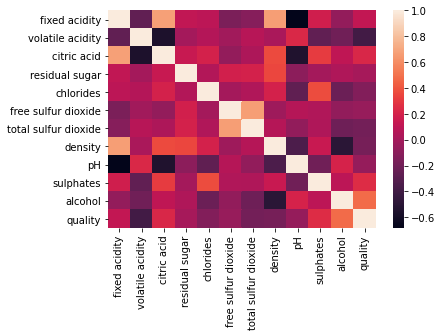

In [81]:
# Do some visualizations to better understand the data
# Take multiple cells if you need it

sns.heatmap(df.corr())

In [106]:
# 2 more graphs etc

# Regression Modeling Section
## Linear Regression

In [83]:
# Create your linear regression model and fit the X and y data frames to it
# You may add any hyperparameters you want to the model

# Use all predicting variables in this model for now
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#Print out R^2, MSE, intercept, all coefficients, and any other evaluation metrics that you think are necessary

# R^2
y_pred = linreg.predict(X)
print("R^2: ", metrics.r2_score(y, y_pred))

# MSE
print("MSE: ", metrics.mean_squared_error(y, y_pred))

# intercept
print("The y intercept:", linreg.intercept_)

# coefficients
coefficients = pd.DataFrame({'feature':feature_col, 
              'coefficient':linreg.coef_}).sort_values(by='coefficient',ascending=False)

coefficients

R^2:  0.3605517030386882
MSE:  0.416767167221408
The y intercept: 21.965208449448525


,feature,coefficient
9,sulphates,0.916334
10,alcohol,0.276198
0,fixed acidity,0.024991
3,residual sugar,0.016331
5,free sulfur dioxide,0.004361
6,total sulfur dioxide,-0.003265
2,citric acid,-0.182564
8,pH,-0.413653
1,volatile acidity,-1.083590
4,chlorides,-1.874225


What do the coefficients mean? Explain and use one of the features as an example to explain coefficients.

When you are done writing in the cell underneath, run the cell or press shift+enter (shift+return for Macs)

Enter Answer Here: The coefficients indicate the correlation between each predictor variable and the dependent variable. For example, volatile acidity has a coefficient of -1.08. It means that holding all other predictor variables constant, when volatile acidity increases by 1, the wine quality rating decreases by 1.08

In [85]:
# Take the features with the 4 highest coefficients and create a X_feat data frame

# taking the features with the highest ABSOLUTE VALUE coefficients because higher abs value indicate a higher correlation

X_feat_columns = ['volatile acidity', 'chlorides', 'density', 'sulphates']
X_feat = df[X_feat_columns]

In [86]:
# Create your linear regression model and fit the variables to it
# You may add any hyperparameters you want to the model

linreg2 = LinearRegression()
linreg2.fit(X_feat, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Print out R^2, MSE, intercept, all coefficients, and any other evaluation metrics that you think are necessary

# R^2
y_pred2 = linreg2.predict(X_feat)
print("R^2: ", metrics.r2_score(y, y_pred2))

# MSE
print("MSE: ", metrics.mean_squared_error(y, y_pred2))

# intercept
print("The y intercept:", linreg2.intercept_)

# coefficients
coefficients2 = pd.DataFrame({'feature':X_feat_columns, 
              'coefficient':linreg2.coef_}).sort_values(by='coefficient',ascending=False)

coefficients2

R^2:  0.23818345201154623
MSE:  0.49652196456901226
The y intercept: 79.28422306629794


,feature,coefficient
3,sulphates,1.240811
0,volatile acidity,-1.390176
1,chlorides,-2.953688
2,density,-73.712537


Does your model with only 4 features do worse or better than the model with all the features? Why is that?

When you are done writing in the cell underneath, run the cell or press shift+enter (shift+return for Macs)

Enter Answer Here: The model with all features did better in the sense that it had a smaller MSE, meaning that the squared difference between predicted and actual y variables are smaller. Theoretically, a higher R^2 is better and the model with all features had a higher R^2. But I am careful to use R^2 as a measure of which model did better because in linear models, a higher number of features always leads to a higher R^2. In this case, I would be concerned about overfitting occuring in the model with all features. To resolve this, I would run a test-train split to test my hypothesis.

## Another Regression Model

In [88]:
# Train/test split your X and y data frames


In [89]:
# Create another regression model and fit the variables to it


In [90]:
# Print out evaluation metrics that you think are necessary


What did you notice different between your chosen model and the linear regression? Why is that?

When you are done writing in the cell underneath, run the cell or press shift+enter (shift+return for Macs)

Enter Answer Here:

# Classification Modeling Section
## Turning the Data Set into Classification Data

Since y is a continuous variable, you will need to turn it into a categorical variable in order to use it for classification. We need to create a y_class data frame from y. So anything that is 0-3 will be notated as 0 for poor, anything between 3.01-7 is 1 for okay, and 7.01-10 is 2 for great.

So if the quality for one of the rows is 4.3, then the new y_class dataframe should say 1 (meaning okay) as it is between 3.01-7.

In [98]:
# Since quality is an integer, we can do a simple replace for the values

df['quality_class'] = df['quality'].replace({3:0, 2:0, 1:0})
df['quality_class'] = df['quality'].replace({4:1, 5:1, 6:1})
df['quality_class'] = df['quality'].replace({7:2, 8:2, 9:2})

y_class = df.quality_class

df['quality_class'].value_counts()

1    1372
2     217
0      10
Name: quality_class, dtype: int64

## Logistic Regression

In [100]:
# Train/test split your data based on your X and y_class data frames

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3)


In [109]:
# Create your logistic regression model and fit the variables to it

lr = LogisticRegression(C=1e9)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
# Print out evaluation metrics that you think are necessary
# Include the intercept and coefficients

print("Test set accuracy of LR model: ", metrics.accuracy_score(y_test, y_test_pred))

print("The y intercept:", lr.intercept_)

# coefficients
df_lr_coef = pd.DataFrame(lr.coef_)
df_lr_coef = pd.DataFrame.transpose(df_lr_coef)
columns = pd.DataFrame(df.columns[:-2])
# df_lr_coef = df_lr_coef.add(columns)

# features 1, 8, 9 seems to have the most signficant impact on wine quality
# followed by feature 7 & 10, then by features 2 & 4
df_lr_coef

Test set accuracy of LR model:  0.8791666666666667
The y intercept: [ 0.16327263  0.6042958  -0.76756843]


,0,1,2
0,0.094078,0.001827,-0.095906
1,1.339778,0.748075,-2.087852
2,-0.339930,-0.190234,0.530165
3,-0.127334,0.013989,0.113345
4,0.148889,0.295910,-0.444799
5,0.021171,-0.031812,0.010641
6,-0.022820,0.029337,-0.006517
7,0.164088,0.603012,-0.767100
8,0.899791,1.165564,-2.065355
9,-0.199968,-1.891617,2.091585


In [145]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[  0   1   0]
 [  0 404  10]
 [  0  47  18]]


In [103]:
print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.98      0.93       414
           2       0.64      0.28      0.39        65

    accuracy                           0.88       480
   macro avg       0.51      0.42      0.44       480
weighted avg       0.86      0.88      0.86       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Another Classification Model

In [95]:
# Create another classification model and fit the variables to it


In [96]:
# Print out evaluation metrics that you think are necessary


What did you notice different between your chosen model and the logistic regression? Why is that?

When you are done writing in the cell underneath, run the cell or press shift+enter (shift+return for Macs)

Enter Answer Here:

# Explanation and Summary

Write a summary on what you did with this data set and why you did it. (Should be about a paragraph or two) Please include why you chose your prompt/question, the importance of your visualization, and the results of the modeling.

Again, when you are done writing in the cell underneath, run the cell or press shift+enter (shift+return for Macs)

Enter Answer Here:

The idea of this project is to create a tool that can assist consumers in determining the highest quality Vino Verde. When information like the ones provided by this algorithm is not available, consumers tend to rely on price as a measure of quality, which could lead to subpar decisions.

Went about this in 2 ways.

Firstly, treat the wine quality (1-10) as a continuous variable.


Then, I converted the wine quality into 3 groups and treated it as a categorial variable.





# Conceptual Questions (OPTIONAL PLEASE READ DESCRIPTION)

These questions are meant for us to gauge your math knowledge so that we can tailor the curiculum to the appropriate level. Some of these questions may be way above your level and it is **completely fine** for you to not know how to do any of them. I would just like to see that you try to do as many as you can. It will **not** be counted against you if you can't solve any of them. I would just ask that you **write a short comment** on what you did not understand for each question.

If you are interested in being a PM or team lead, not completing these questions won't count against you but **may help you**.

If you need any help at all feel free to reach out to Jason Liu at (jl9724@stern.nyu.edu).

Questions developed with assistance from Derek Huang.

1. Suppose we have a set of points $ y_1, \ldots y_N $, where each $ y_k $ is a real number. Define the loss/cost function $ J $ such that for real $ \kappa $,

   $$ J(\kappa) = \sum_{k = 1}^{N}(y_k - \kappa)^2 $$

   Show that $ J $ is uniquely minimized by $ \hat{\kappa} $, where

   $$ \hat{\kappa} = \frac{1}{N}\sum_{k = 1}^{N}y_k $$

   In other words, show that $ \hat{\kappa} $ is the mean of the elements $ y_1, \ldots y_N $.
   
   *Hint*. Use the fact that $ J $ is strictly convex + has a unique minimum, so the derivative of $ J $ at $ \hat{\kappa} $ is zero.

2. Suppose we have a set of points $ y_1, \ldots y_N $, where each $ y_k $ is an independent realization of the random variable $ Y \sim \mathrm{Bernoulli}(p) $ and is either $ 0 $ or $ 1 $ In other words, the data is the result of $ N $ coin flips, where heads is $ 1 $, tails is $ 0 $, and the probability of getting heads is $ p $. 

   Since each $ y_k $ is independently sampled, the joint likelihood for the data is

   $$ \ell(\theta) = \prod_{k = 1}^N\theta^{y_k}(1 - \theta)^{1 - y_k} $$

   Define $ N_+ $ as the number of points with label $ 1 $ and $ N_- $ as the number of points with label $ 0 $. Necessarily $ N_+ + N_- = N $.
   
   Show that the maximum likelihood estimate of $ p $, $ \hat{\theta} $, is such that

   $$ \hat{\theta} = \frac{N_+}{N_+ + N_-} $$

   *Hint*. $ \ell $ has a unique maximum, which is $ \hat{\theta} $. Use the fact that $ \ell(\theta) = \theta^{N_+}(1 - \theta)^{N_-} $ and the fact that the derivative of $ \ell $ at $ \hat{\theta} $ is zero.

### This question tests some basic linear algebra. It is easier than it looks so no hint is provided.

3. Suppose we have a real matrix $ \mathbf{X} \in \mathbb{R}^{N \times n} $, where each row $ k $ of the matrix corresponds to a single transposed data example $ \mathbf{x}_k^\top $. Assuming that each row $ \mathbf{x}_k^\top $ is independently sampled from the same vector-valued continuous distribution, the sample mean $ \bar{\mathbf{x}} \in \mathbb{R}^n $ of the data points is such that

   $$ \bar{\mathbf{x}} = \frac{1}{N}\mathbf{X}^\top\mathbf{1} = \frac{1}{N}\begin{bmatrix} \ \mathbf{x}_1 & \ldots & \mathbf{x}_N \ \end{bmatrix}\mathbf{1} = \frac{1}{N}\sum_{k = 1}^N\mathbf{x}_k $$

   Here $ \mathbf{1} \in \mathbb{R}^N $, the $ \mathbb{R}^N $ vector of all $ 1 $s.
   
   Show that the centered matrix $ \tilde{\mathbf{X}} $, where $ \tilde{\mathbf{X}} = \mathbf{X} - \mathbf{1}\bar{\mathbf{x}}^\top $, may be equivalently written as the product of the centering matrix and $ \mathbf{X} $, i.e. that

   $$ \tilde{\mathbf{X}} = \left(\mathbf{I} - \frac{1}{N} \mathbf{11}^\top\right)\mathbf{X} $$

   Here $ \mathbf{I} $ is the $ N \times N $ identity matrix.